https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html

In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

The AerSimulator
1.AerSimulator.available_devices() : Return the available simulation devices.

2.AerSimulator.available_methods() : Return the available simulation methods.

In [2]:
simulator = AerSimulator()

Simulating a Quantum Circuit

The basic operation runs a quantum circuit and returns a counts dictionary of measurement outcomes. Here we run a simple circuit that prepares a 2-qubit Bell-state 
 
 and measures both qubits. 

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


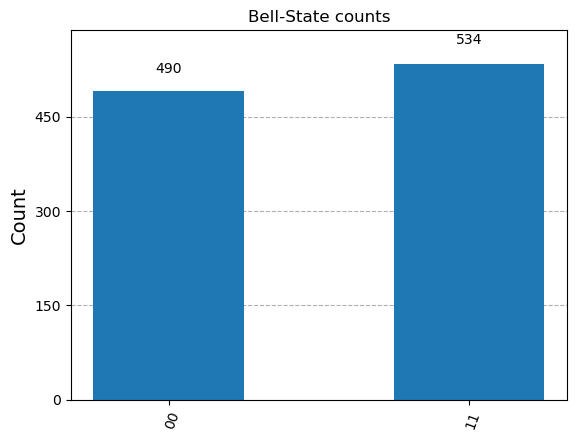

In [5]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)
#print circuit
print(circ)
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [7]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '00', '11', '11', '11', '00', '00', '11', '00', '00']


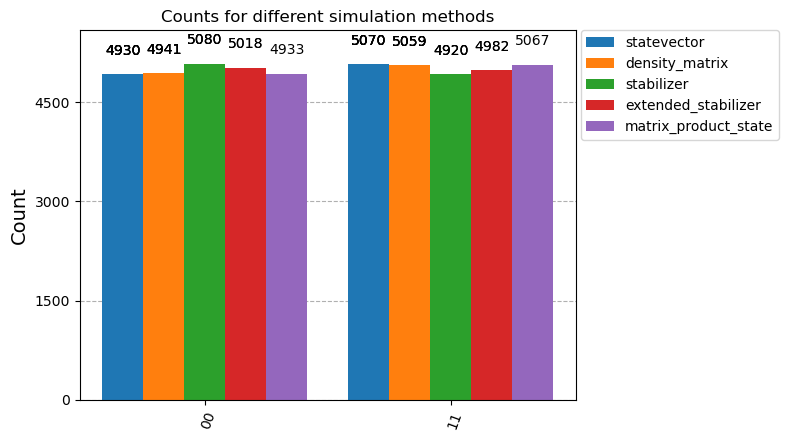

In [8]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

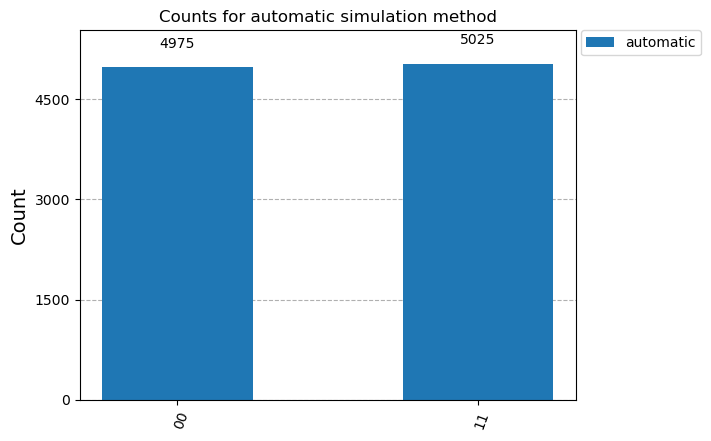

In [9]:
# automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

In [10]:
import qiskit
qiskit.__version__

'1.3.0'